In [410]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance


# MODELS 

* Random Forest Classifier
* Decision Tree Classifier
* Logistic Regression
* XGBoost

## DATA PREPROCESSING

In [411]:
dataPath = r"data\xAPI-Edu-Data.csv"
data = pd.read_csv(dataPath)

* To create a Training and Testing dataset, We are  going to drop the **Class** column as it will be the target attribute for prediction/classification.
* We are going to store the **Class** column in a different dataframe as the **Traget Attribute**.
* To do this, we're going to use the Pandas function **drop** and save the new dataframe to a **Features** variable. 
 

In [412]:
Features = data.drop(['Class'],axis=1)
Target = data['Class']
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7


* Now using the Pandas' **head** function, we see the new content of the dataframe.
* We can notice that there are non-numerical attributes in this dataframe, we need to convert it to numerical before feeding to our model. 
* First let us look at the unique values of these non-numerical attributes, and then compare the result after converting to numerical to confirm if it is converted correctly as we want. 

In [413]:
print("gender attribute:", Features['gender'].unique())
print("NationalITy attribute:", Features['NationalITy'].unique())
print("StageID attribute:", Features['StageID'].unique())
print("GradeID attribute:", Features['GradeID'].unique())
print("SectionID attribute:", Features['SectionID'].unique())
print("Topic attribute:", Features['Topic'].unique())
print("StudentAbsenceDays attribute:", Features['StudentAbsenceDays'].unique())





gender attribute: ['M' 'F']
NationalITy attribute: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
StageID attribute: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID attribute: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID attribute: ['A' 'B' 'C']
Topic attribute: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
StudentAbsenceDays attribute: ['Under-7' 'Above-7']


* We have a total of 7 non-numerical attribures with the following values shown above.
* Now, let's convert these to numerical values and see.
* To do this we're going to use a function called **LabelEncoder()**. This will automatically arrange each attributes' values and convert it into numerical values. 

In [414]:
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0


* Now we can see that the content of the **Features** dataframe are now all numerical. 
* Let us see the difference between non-numerical and numerical values to see how it was converted.

In [415]:
print("gender attribute:", Features['gender'].unique())
print("NationalITy attribute:", Features['NationalITy'].unique())
print("StageID attribute:", Features['StageID'].unique())
print("GradeID attribute:", Features['GradeID'].unique())
print("SectionID attribute:", Features['SectionID'].unique())
print("Topic attribute:", Features['Topic'].unique())
print("StudentAbsenceDays attribute:", Features['StudentAbsenceDays'].unique())


gender attribute: [1 0]
NationalITy attribute: [ 4 12  0  8 11  3 13  1 10  6  9  7  2  5]
StageID attribute: [2 1 0]
GradeID attribute: [1 4 5 3 2 6 9 8 7 0]
SectionID attribute: [0 1 2]
Topic attribute: [ 7  8  0 10  3  9 11  4  6  1  2  5]
StudentAbsenceDays attribute: [1 0]


* From the result above, let us take for example the **NationalITy attribute**. 
* Comparing from these: **['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']**
* We can see that the **LabelEncoder** function encoded these values into numerical by taking its alphabetical order.


* Now, let us finally split the dataset into 80% and 20% ratio for training and test set respectively.

In [416]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)


## TRAINING


* Now let us jump to training our models. 
* Let us start by defining the models that we are going to use.


In [417]:
models = {  'Logistic Regression':  LogisticRegression(), 
            'Decision Tree':        DecisionTreeClassifier(),
            'Random Forest':        RandomForestClassifier(),
            'XGBoost':              XGBClassifier()
         }


* Let us first use the default parameters of each models to have the baseline idea of the performance.
* Let us print the default parameters of each models below. 

In [418]:
import inspect
for k,v in models.items():
    mod = v
    print('Default Parameters for: ' + str(k) + '\n')
    print(mod.get_params())
    print('\n' + '\n')


Default Parameters for: Logistic Regression

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



Default Parameters for: Decision Tree

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}



Default Parameters for: Random Forest

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples

### Here comes the actual training

In [419]:
keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: Logistic Regression

[[26  1  8]
 [ 0 20  2]
 [ 4  5 30]]
              precision    recall  f1-score   support

           H       0.87      0.74      0.80        35
           L       0.77      0.91      0.83        22
           M       0.75      0.77      0.76        39

    accuracy                           0.79        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.80      0.79      0.79        96

accuracy is 0.7916666666666666



Results for: Decision Tree

[[23  1 11]
 [ 0 20  2]
 [ 6  2 31]]
              precision    recall  f1-score   support

           H       0.79      0.66      0.72        35
           L       0.87      0.91      0.89        22
           M       0.70      0.79      0.75        39

    accuracy                           0.77        96
   macro avg       0.79      0.79      0.78        96
weighted avg       0.77      0.77      0.77        96

accuracy is 0.7708333333333334



Results for: Random Forest

[[28  

# FINE TUNING 
## DECISION TREE AND RANDOM FOREST CLASSIFIERS

* Now, let us look on the parameters that we can adjust to fine tune the models to achieve higher accuracy.



#### Number of Estimators 

* Let us start with the **Number of Estimators** for Random Forest Classifier
* **n_estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

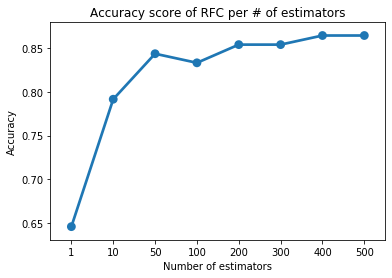

In [420]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

* The graph above suggests that the optimal number of estimators for our RFC is around 300 to 400 where the accuracy started to be stable.

#### Maximum Depth

* **max_depth** represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the Accuracy and Number of depths.

* Now let us examine the effect of adjustig the **max_depths** for both **Radndom Forest Classifier** and **Decision Tree Classifier**


* Let us start with **Radndom Forest Classifier**

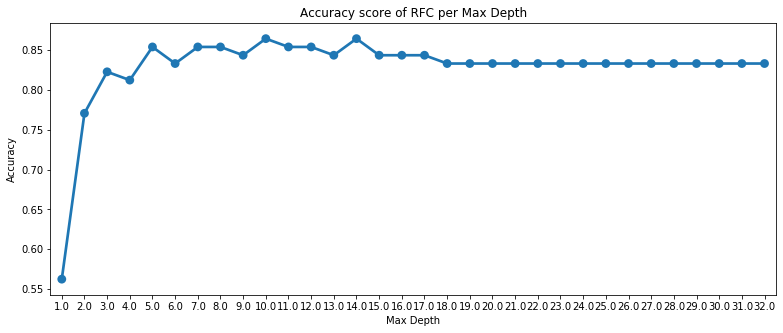

In [421]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in max_depths:
    rfc1 = RandomForestClassifier(max_depth=d,random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Max Depth', ylabel='Accuracy', 
         title='Accuracy score of RFC per Max Depth')
plt.show()

* Now for **Decision Tree Classifier**.

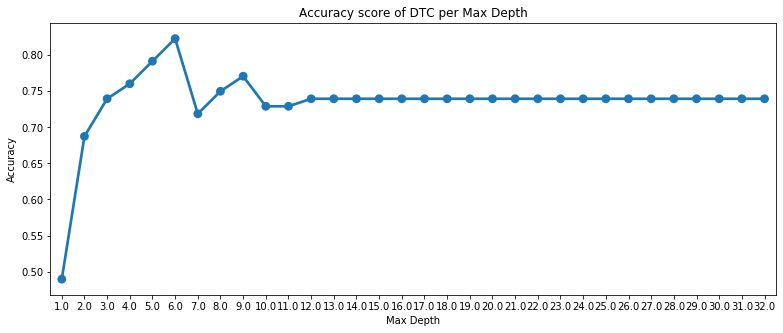

In [422]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in max_depths:
    dt = DecisionTreeClassifier(max_depth=d,random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Max Depth', ylabel='Accuracy', 
         title='Accuracy score of DTC per Max Depth')
plt.show()

* The two graphs suggests that the optimized max_depths are 12 for Decision Tree while 18 for Random Forest Classiffier. 
* These values are picked from where the accuracy startedto plateu, it means that the classification accuracy started to became stable at this rate.

#### Minimum Samples Split

* **min_samples_split** represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

* Let us start looking at adjusting this parameter for **Random Forest Classifier**

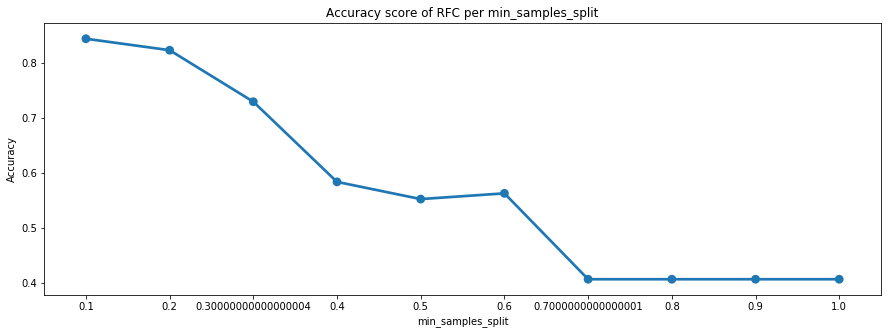

In [423]:

plt.figure(figsize=(15,5))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
score = []
est = []
for s in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=s,random_state=52)
    pred1 = rfc.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(s)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='min_samples_split', ylabel='Accuracy', 
         title='Accuracy score of RFC per min_samples_split')
plt.show()

* Now let us look at **Decision Tree Classifier**

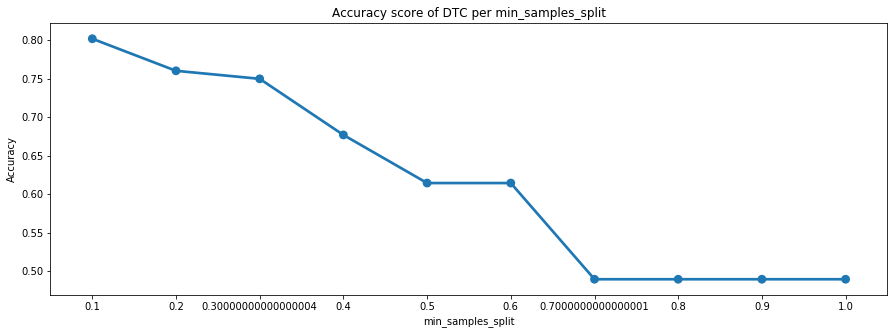

In [424]:

plt.figure(figsize=(15,5))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
score = []
est = []
for s in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=s,random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(s)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='min_samples_split', ylabel='Accuracy', 
         title='Accuracy score of DTC per min_samples_split')
plt.show()

* We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

# APPLYING THE FINETUNED PARAMETERS
## DECISION TREE AND RANDOM FOREST CLASSIFIERS


* Now let us apply these findings to train the RFC and DTC again and let us see if we can get better performance.

In [425]:
models = {  
        'Decision Tree':        DecisionTreeClassifier(max_depth = 12,min_samples_split = 0.2, random_state = 52),
        'Random Forest':        RandomForestClassifier(max_depth = 18,min_samples_split = 0.1, n_estimators = 400,random_state = 52 )
         }

keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: Decision Tree

[[33  0  2]
 [ 0 16  6]
 [13  2 24]]
              precision    recall  f1-score   support

           H       0.72      0.94      0.81        35
           L       0.89      0.73      0.80        22
           M       0.75      0.62      0.68        39

    accuracy                           0.76        96
   macro avg       0.79      0.76      0.76        96
weighted avg       0.77      0.76      0.76        96

accuracy is 0.7604166666666666



Results for: Random Forest

[[28  0  7]
 [ 0 20  2]
 [ 1  2 36]]
              precision    recall  f1-score   support

           H       0.97      0.80      0.88        35
           L       0.91      0.91      0.91        22
           M       0.80      0.92      0.86        39

    accuracy                           0.88        96
   macro avg       0.89      0.88      0.88        96
weighted avg       0.89      0.88      0.88        96

accuracy is 0.875





* We can see that after applying the optimum parameter values, RFC performed better while DTC remained almost the same. 

* Let us take a look at the trees of RFC and DTC
* Here, we cannot show the whole forest from RFC but we can take some of its trees. 
* Let us try the first tree of RFC.


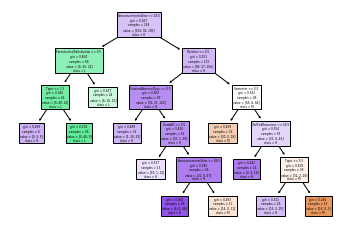

In [426]:
cols = data.columns.tolist()
labels =  data['Class'].unique()

rfs = RandomForestClassifier(max_depth = 18,min_samples_split = 0.1, n_estimators = 300,random_state = 52 ).fit(X_train, y_train)
plot_tree(rfs.estimators_[0], filled=True, feature_names = cols, class_names = labels)
plt.show()

* The plot above shows that the attribute **AnnouncementView** is one of the top contributor in the classification. 
* And if a student has viewed more than 18 announcement, he will be highly possibility to get a high grade.

* Now let us look at Decision Tree

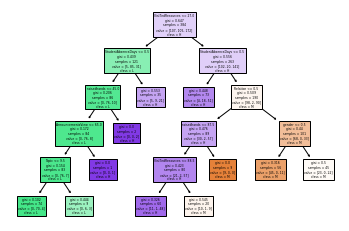

In [427]:
decisionTree = DecisionTreeClassifier(max_depth = 12,min_samples_split = 0.2, random_state = 52).fit(X_train, y_train)
plot_tree(decisionTree, filled=True, feature_names = cols, class_names = labels)
plt.show()

* We can see from the tree plot above that the most important attribute is the **VisitedResources** and next is the **StudentAbsenceDays**
* This is pretty obvious in real life. That if you dont visited your acad resources often and if you have a lot of absences, you'll have a high chance of getting lower grade.

* The following graphs bellow shows the Feature Importance for RFC and DTC.
* Here we can have a broader view of which is the most important attribute for the RFC since we cannot view its overall forest.


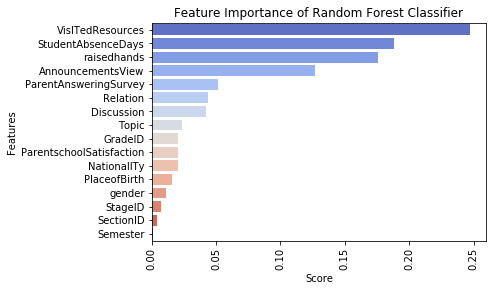

In [428]:
rfc = RandomForestClassifier(max_depth = 18,min_samples_split = 0.1, n_estimators = 300,random_state = 52 ).fit(X_train, y_train)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':Features.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

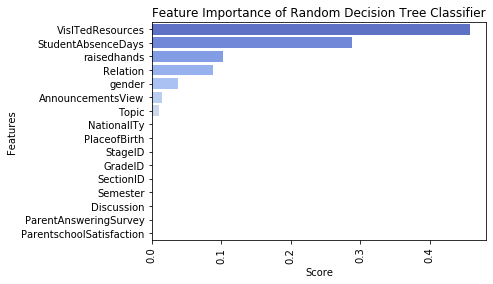

In [429]:
dt =DecisionTreeClassifier(max_depth = 12,min_samples_split = 0.2, random_state = 52).fit(X_train, y_train)
pred = dt.fit(X_train, y_train).predict(X_test)
dn = {'features':Features.columns, 'score':dt.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Decision Tree Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

* In the two graph above, we can see that it differs in terms of Gender and Relation in which gave more impact in DTC and topped the AnnouncementView and ParentsAnsweringSurvey features in the RFC.


# FINE TUNING
## LOGISTIC REGRESSION


### REGULARIZATION

### Logistic Regression with Cost function penalized by L2 Regularization

$   min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $


### Logistic Regression with Cost function penalized by  L1 Regularization

$   min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)    $


* Above shows the cost functions that is using L2 and L1 Regularization respectively.
* Regularization works by keeping all the features from the dataset but reducing the magnitude/values of parameters. 
* One advantage of Regularization is  that it improves numerical stability.
* Another is it helps avoid overfitting from the dataset. 

* From the previous implementation of Logistic Regresion, the default cost function is using the L2 Regularization where we've got a 0.79 accuracy. 


### OPTIMIZER

* There are Three possibile optimizer that we can use. **Gradient Descent, Newton Method, and Quasi-Newton Method.**
* In this application we dont use the classic Gradient Descent.
* By default, **SKLearn's Linear Regression** is using **LBFGS** (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) and it only supports **L2 Regularization**. 
* **LBFGS** is derived from the original **BFGS** method that is categorized as the **Quasi-Newton Method**.
* **QN Method** uses Hessian Matrix approach. BFGS requires large memory in executing the program so LBFGS was developed.  (https://aip.scitation.org/doi/10.1063/1.4995124)
* From LBFGS we achieved **0.79** accuracy.

* Let us try to use the **Newton Method** and examine which will perform better for our dataset. 




In [430]:
models = {  'Logistic Regression':  LogisticRegression(solver='newton-cg', C= .2) }
keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})


Results for: Logistic Regression

[[29  1  5]
 [ 0 21  1]
 [ 2  4 33]]
              precision    recall  f1-score   support

           H       0.94      0.83      0.88        35
           L       0.81      0.95      0.88        22
           M       0.85      0.85      0.85        39

    accuracy                           0.86        96
   macro avg       0.86      0.88      0.87        96
weighted avg       0.87      0.86      0.86        96

accuracy is 0.8645833333333334





* We can see that Logistic Regression achieved better performance by changing to **newton-cg** optimizer and setting the inverse of regularization strength to **0.2**.
* The inverse of regularization strength **C** parameter specifies stronger effect at lower value.  

## FINE TUNING
### XGBoost

* **XGBoost** is a decision-tree-based ensemble Machine Learning Algorithm that uses a gradient boosting framework.
* In terms of System Optimization and Algorithmic Enhancements, XGBoost has the following features:

#### System Optimization:

1) Parallelization 
2) Tree Pruning
3) Hardware Optimization

### Algorithmic Enhancement:

1) Regularization
2) Sparsity Awareness
3) Weighted Quantile Sketch
4) Cross-validation




* Since XGBoost is a decision-tree-based classifier, let us fine-tune this model based on how we fine-tuned the Decision Tree and Random Forest classifiers.

* First let us find the optimal number of estimator by doing the same as what we did for DTC and RFC
* Below we can see that XGB performed best with only 10 estimators, but became more stable at more than 400.   

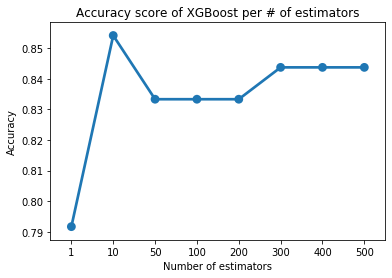

In [431]:
# Exploring the number of estimators in the XGBoost
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = XGBClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of XGBoost per # of estimators')
plt.show()

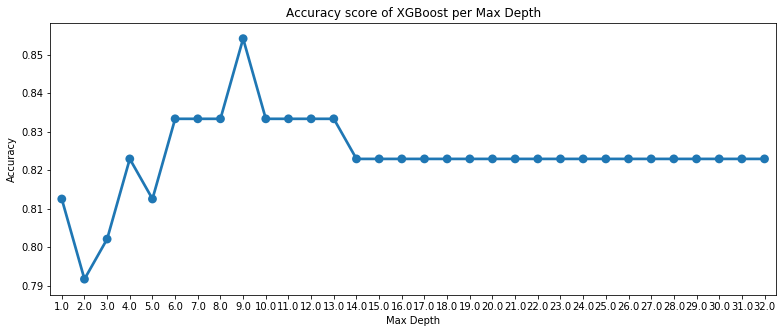

In [432]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in max_depths:
    dt = XGBClassifier(max_depth= int(d),random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Max Depth', ylabel='Accuracy', 
         title='Accuracy score of XGBoost per Max Depth')
plt.show()

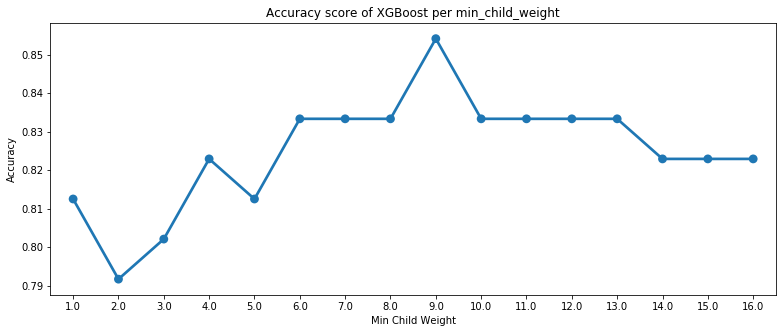

In [433]:
min_child_weight = np.linspace(1, 16, 16, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in min_child_weight:
    dt = XGBClassifier(max_depth= int(d),random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Min Child Weight', ylabel='Accuracy', 
         title='Accuracy score of XGBoost per min_child_weight')
plt.show()

In [434]:
models = {  
        'XGBClassifier':        XGBClassifier(max_depth = 16, n_estimators = 300,min_child_weight=10,random_state = 52 )
         }

keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: XGBClassifier

[[26  0  9]
 [ 0 21  1]
 [ 5  5 29]]
              precision    recall  f1-score   support

           H       0.84      0.74      0.79        35
           L       0.81      0.95      0.88        22
           M       0.74      0.74      0.74        39

    accuracy                           0.79        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.79      0.79      0.79        96

accuracy is 0.7916666666666666





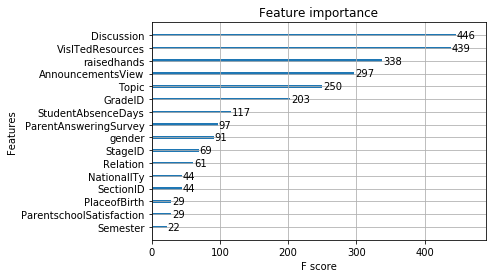

In [435]:
plot_importance( XGBClassifier(max_depth = 16, n_estimators = 300,min_child_weight=10,random_state = 52 ).fit(X_train, y_train))